# A series expansion of an exponential

---

- Team Lead: Leonardo
- Lead Dev: Raphael
- Data Scientist: Leonardo (cover for Michelangelo), 
- Quality Assurance: Donatello

## Summary and conclusions

Exponential functions $f(x) = \exp(x)$ arise commonly in science and engineering, for example, in population dynamics models and models for chemical reactions. The next figure plots an exponential function. 

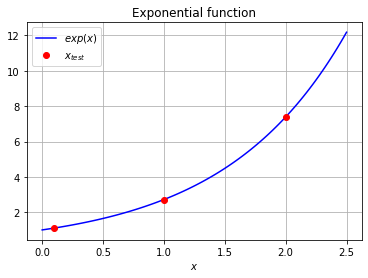

In [6]:
# Plot the exponential function along with the test points
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0., 2.5, 100)
x_test = np.array([0.1, 1.0, 2.0])
fig, ax = plt.subplots()
p1 = ax.plot(x, np.exp(x), 'b-', label='$exp(x)$')
p2 = ax.plot(x_test, np.exp(x_test), 'ro', label='$x_{test}$')

ax.grid(True)
ax.set_xlabel('$x$')
ax.set_title('Exponential function')
ax.legend()

plt.show()

The exponential function has an infinite series expansion, 
$$\exp(x) \;=\; f(x) \;=\; \sum_{k=0}^\infty \frac{x^k}{k!}.$$
but computers can't compute infinity. One way to approximate the exponential on the computer is to truncate the infinite series at finitely many terms, which enables computation
$$\exp(x) \;\approx\; f_n(x) \;=\; \sum_{k=0}^n \frac{x^k}{k!}.$$
To study how the approximation accuracy depends on the truncation level, we devised the following experiment. We chose three different $x$ values: $x=0.1$, $x=1.0$, and $x=2.0$, which are shown in the figure above. Here's why. We looked at the exponential function and we noticed that the exponential function got steeper for more positive values. We thought this steepness might influence the approximation quality. For each $x$, we computed the relative error 
$$
\text{error}(x,n) \;=\; \frac{|f(x) - f_n(x)|}{|f(x)|}, \quad n=1,\dots,21.
$$
The plot in _Data visualization_ shows how the error behaves as $n$ increases. Each line corresponds to a different $x$. The plot suggests that the error depends on the value of $x$ in the following way. The error decreases much faster for $x=0.1$ than for $x=2.0$. Given the generality of these points, the experiment suggests that a truncated series expansion of the exponential function may be more accurate for values of $x$ close to $0$.

If we had an opportunity to pursue this inquiry further, we would consider the following questions.
- How does the convergence rate depend precisely on $\exp(x)$?
- How might scaling the function affect the approximation $c_1 \exp( c_2 x )$ for positive $c_1$, $c_2$? 
- Does this result translate to other functions besides the exponential?


In [24]:
import numpy as np
import matplotlib.pylab as plt

## Method implementations

We designed a function that takes a truncation level $n$ and an evaluation point $x$ and returns the truncated series approximation of $\exp(x)$. We also designed an error function. We measure accuracy of the approximation as the relative error with respect to the built-in function **np.exp**, which we consider the true value. The cost measure we consider is the truncation level $n$, which enables the numerical experiment. We could have chosen to measure accuracy as the number of additions and multiplications, but such a measure was not relevant to the experiment.


In [25]:
def truncated_exp(x, n):
    r""" Compute the trucated series approximation of exponential
    
    Parameters
    ----------
    x : float
        Evaluation point
    n : int
        Truncation level
    
    Returns
    -------
    y : float
        Truncated exponential approximation
    
    """
    # a for-loop implementation
    y = 0;
    for k in range(n+1):
        y = y + np.power(x, k) / np.math.factorial(k)
    
    return y

def truncation_error(x, n):
    r""" Compute the trucation error
    
    Parameters
    ----------
    x : float
        Evaluation point
    n : int
        Truncation level
    
    Returns
    -------
    error : float
        Relative error in trucated series approximation
    
    """
    truth = np.exp(x)
    approx = truncated_exp(x, n)
    error = np.fabs(truth - approx) / np.fabs(truth)
    
    return error


## Code verification tests

To verify the implementation, we construct two tests based on known mathematical properties of the exponential function.
1. Test 1
    - **Property:** Truncated approximation $f_0(x) = 1$ for all $x$. 
    - **Test:** Draw $x$ randomly between -3 and 3 and check that $f_0(x)$ is close enough to 1. 
2. Test 2
    - **Property:** Truncated approximation $f_n(0) = 1$ for all $n$. 
    - **Test:** Check that $f_n(0)$ is close enough to 1 for $n$ from 1 to 100.


In [4]:
def test1():
    r""" Test 1
    
    Using the property that truncated_exp(x,0) should equal 1 for all x, 
    we generate random x's and check whether the result is close to 1.
    
    """
    # Draw 100 random x's between -3 and 3
    x = np.random.uniform(-3., 3., (100,1))
    
    # Evaluate the function at all x's with truncation level 0
    f = truncated_exp(x, 0)
    
    # Check that the results are close to 1
    check = np.allclose(f, np.ones(f.shape))
    
    if check:
        print('Passed 1')
    else:
        print('Failed 1')
        
def test2():
    r""" Test 2
    
    Using the property that truncated_exp(0,n) should equal 1 for all n, 
    we evaluate the function for n's from 0 to 99.
    
    """
    check = True
    
    # Check that the returned value is close to 1 for each n
    for n in range(100):
        f = truncated_exp(0., n)
        check = check * np.allclose(f, 1.)
    
    if check:
        print('Passed 2')
    else:
        print('Failed 2')
    
test1()
test2()


Passed 1
Passed 2


## Numerical experiment

To study a range of $x$'s, we chose $x = 0.1, 1.0, 2.0$. For each $x$, we computed the relative error for a truncated series approximation, where the trucation level $n$ ranged from 1 to 21. This experiment enables us to examine the relationship between the truncation level and the approximation quality. Varying $x$ provides insight into how the approximation quality changes for different evaluation points.


In [26]:

x = np.array([0.1, 1., 2.]) # three different values of x
n = np.arange(1, 21) # range of truncations
err = np.zeros((len(n), len(x))) # allocate memory for error

for i in range(len(n)):
    for j in range(len(x)):
        
        # Compute the true value np.exp
        truth = np.exp(x[j])
        
        # Compute the approximate value
        approx = truncated_exp(x[j], n[i])
        
        # Compute the relative error
        err[i,j] = np.fabs(truth - approx) / np.fabs(truth)
        
# Store the data at the end of the experiment
%store n err

Stored 'n' (ndarray)
Stored 'err' (ndarray)


## Data validation tests

To validate the data, we construct a test based on the fact that the errors should be positive.

- **Property:** Errors are non-negative 
- **Test:** Check that all errors are positive

In [27]:
# Recall data for validation tests
%store -r n err

check = np.all(err>0.)

if check:
    print('Passed')
else:
    print('Failed')

Passed


## Data visualization

To observe the relationship between the truncation level and accuracy, we plotted the relative error on a log scale versus the truncation level. Each line represents a different value for $x$. 


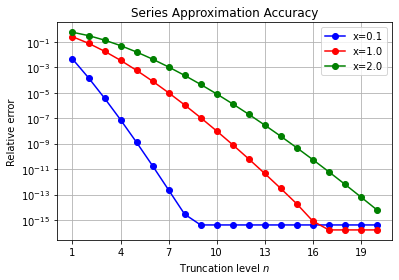

In [28]:
# Recall data for visualization
%store -r n err

# Plot error on a log scale versus truncation level for each value of x
fig, ax = plt.subplots()
p1 = ax.semilogy(n, err[:,0], 'bo-', label='x=0.1')
p2 = ax.semilogy(n, err[:,1], 'ro-', label='x=1.0')
p3 = ax.semilogy(n, err[:,2], 'go-', label='x=2.0')

ax.grid(True)
ax.set_xlabel('Truncation level $n$')
ax.set_ylabel('Relative error')
ax.set_title('Series Approximation Accuracy')
ax.set_xticks(n[::3])
ax.legend()

plt.show()

## Conclusions

The experiment and plots suggest that the error decreases rapidly to zero for any value of $x$. However, the error decreases more rapidly $x$ closer to 0.

## References

- _Exponential function_, Wikipedia (https://en.wikipedia.org/wiki/Exponential_function)


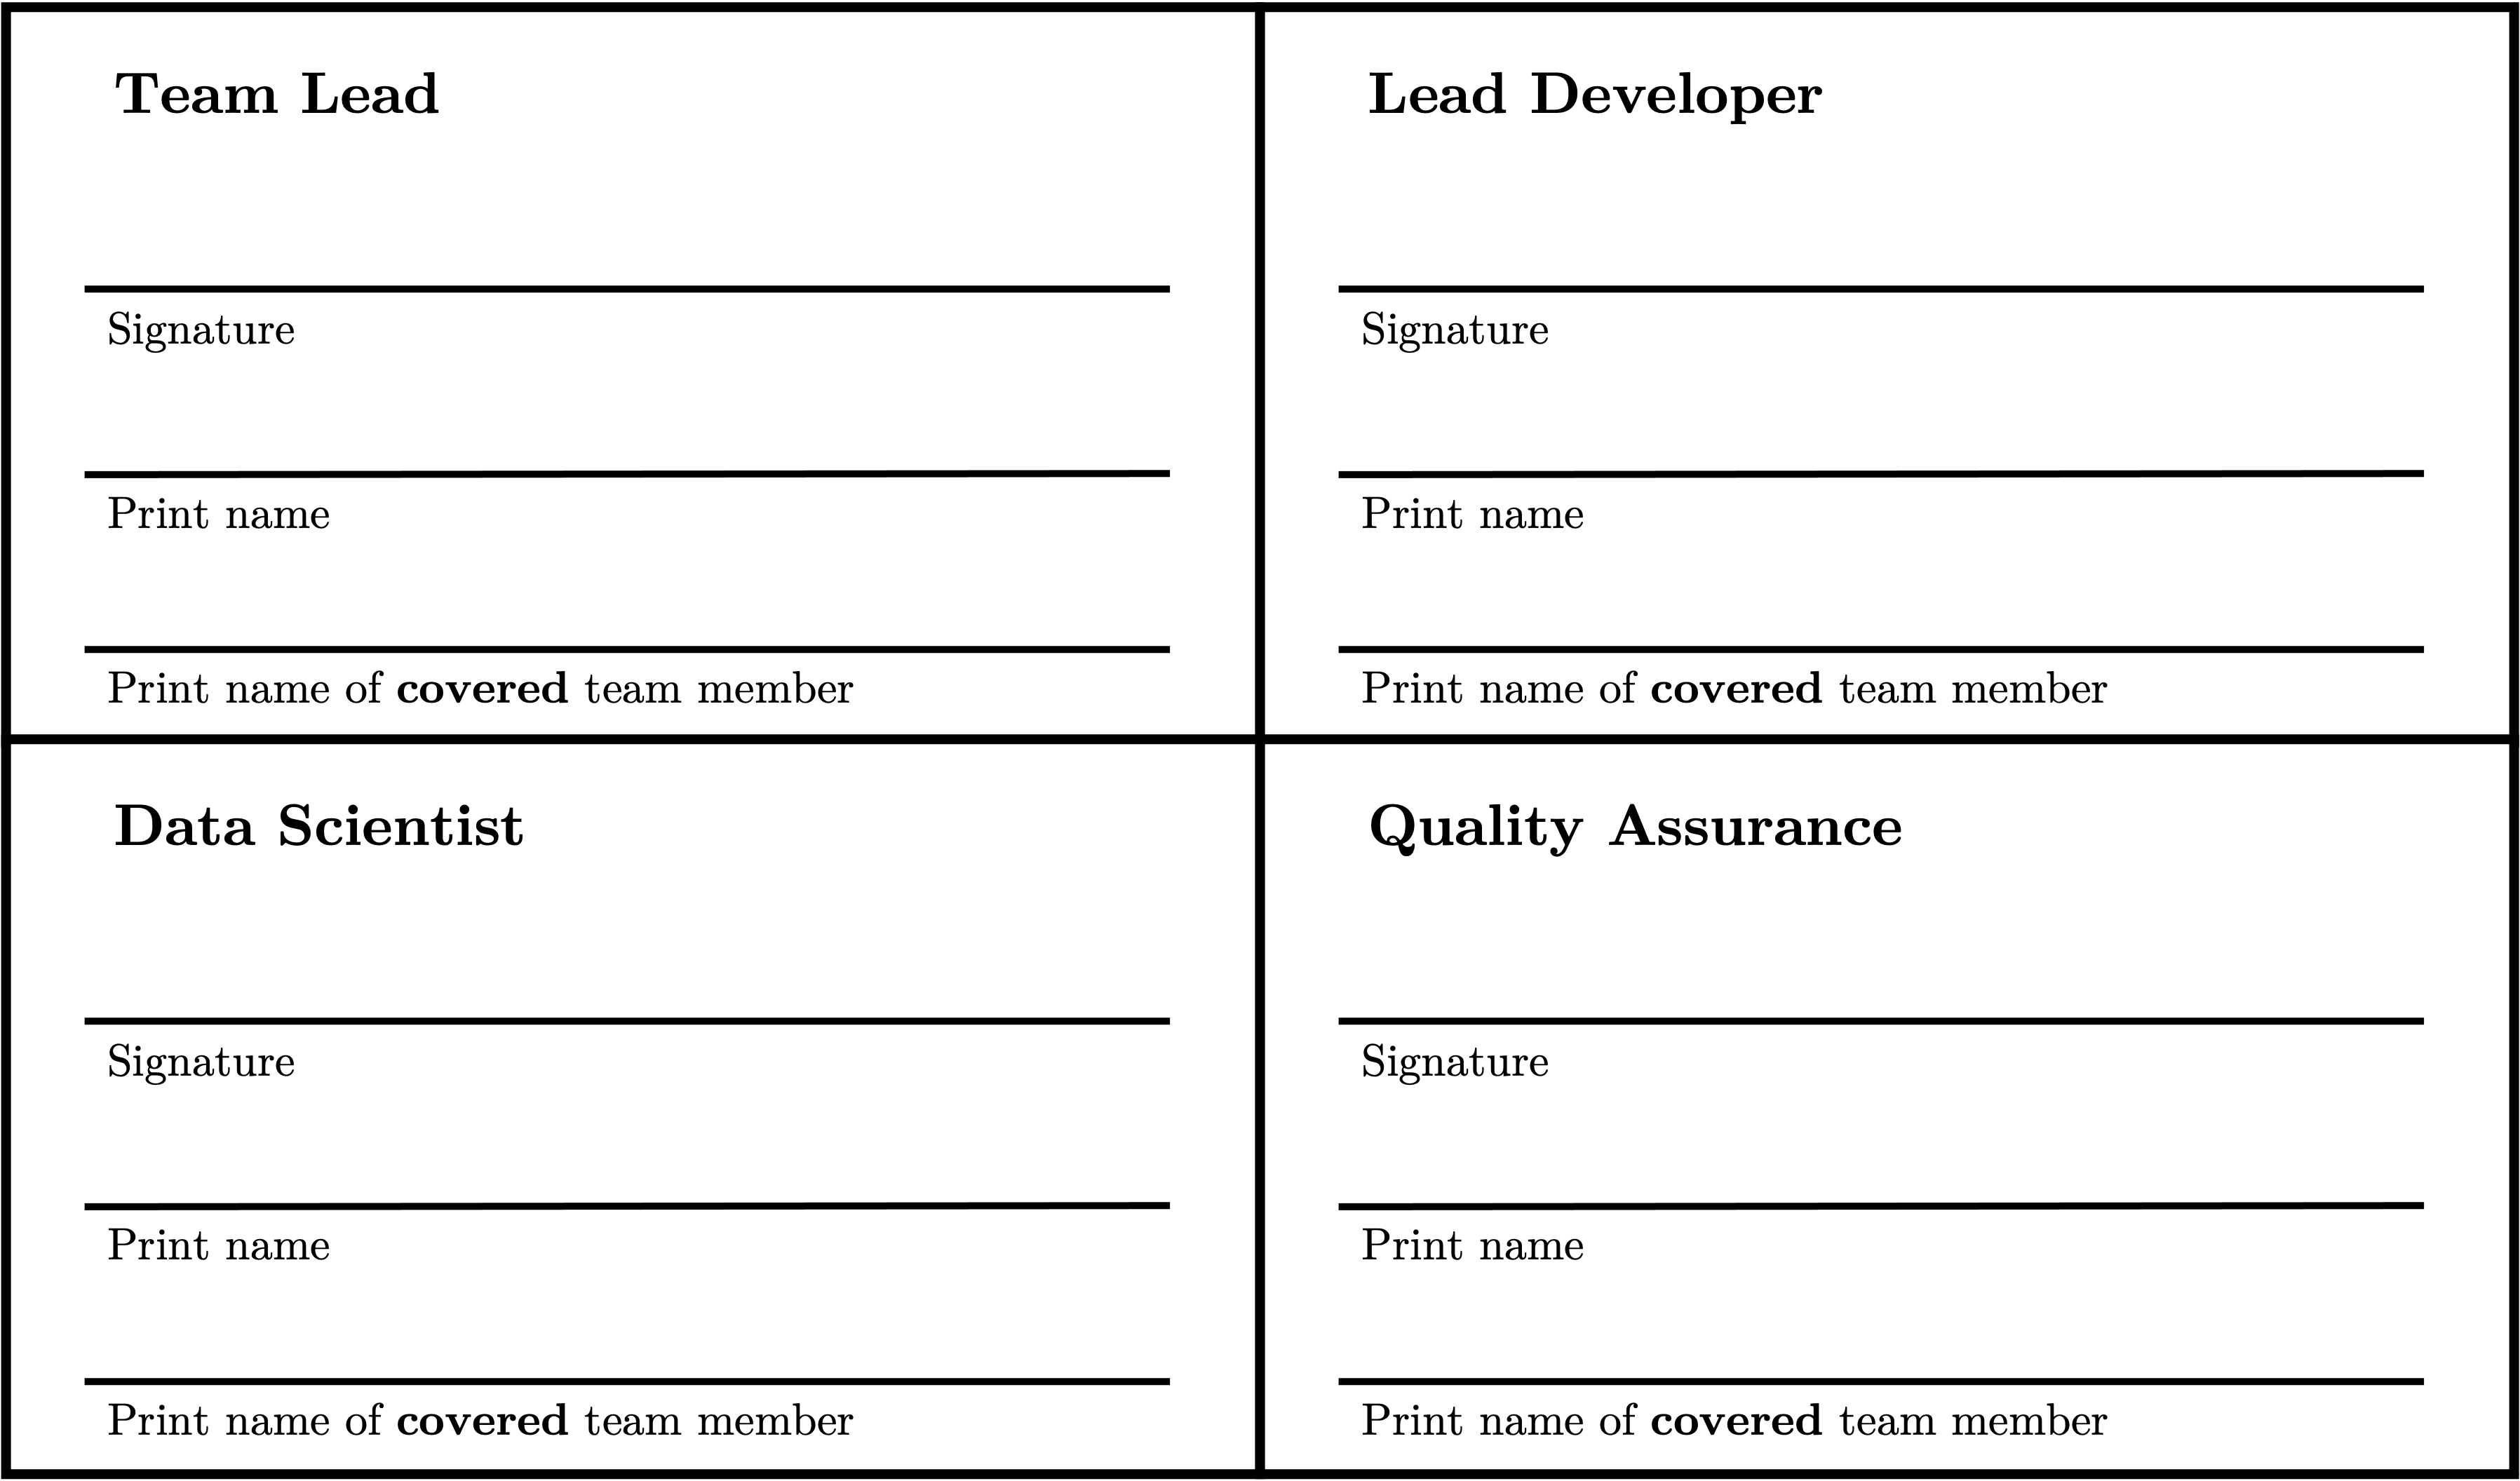